In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic (3).csv


In [42]:
df =  pd.read_csv('titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [43]:
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

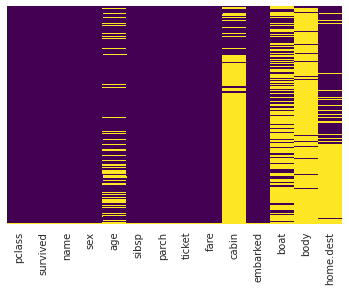

In [44]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [45]:
sns.set_style('whitegrid')

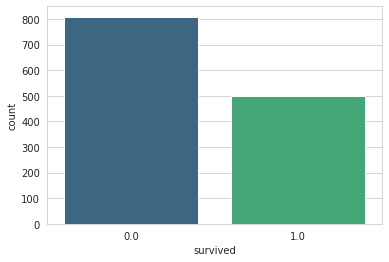

In [46]:
sns.countplot(data=df,x='survived',palette='viridis')

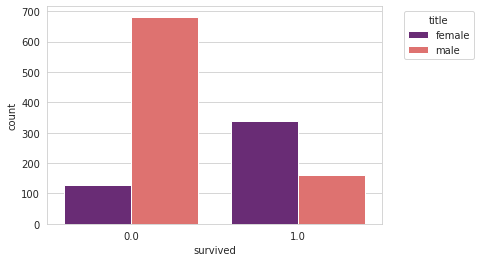

In [47]:
sns.countplot(data=df,x='survived',palette='magma',hue='sex')
plt.legend(title='title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

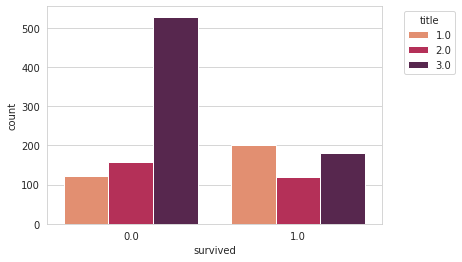

In [48]:
sns.countplot(data=df,x='survived',palette='rocket_r',hue='pclass')
plt.legend(title='title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


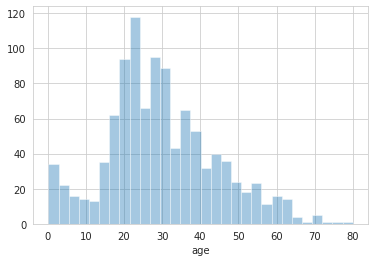

In [49]:
sns.distplot(df['age'].dropna(),kde=False,bins=30) # no. of passengers onboard

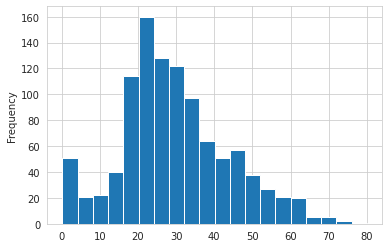

In [50]:
df['age'].plot.hist(bins=20)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


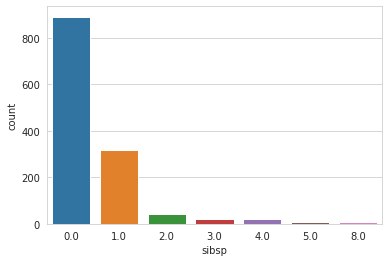

In [52]:
sns.countplot(data=df, x='sibsp')
plt.show()

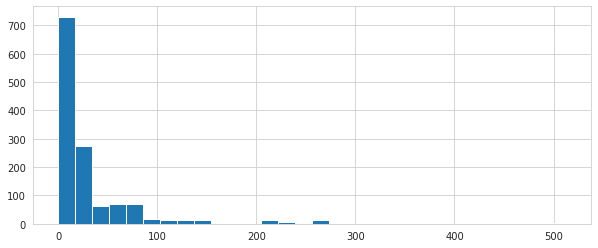

In [53]:
df['fare'].hist(bins=30,figsize=(10,4))
plt.show()

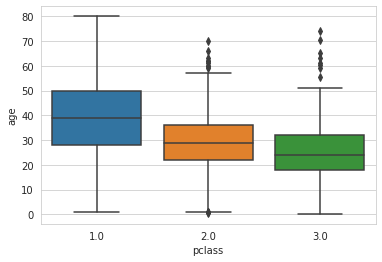

In [54]:
sns.boxplot(data=df,x='pclass',y='age') 
plt.show()

In [55]:
df['pclass'].value_counts()

3.0    709
1.0    323
2.0    277
Name: pclass, dtype: int64

In [56]:
def set_age(column):
  age=column[0];
  pclass=column[1];

  if pd.isnull(age):
    if pclass == 1:
      return 38
    if pclass == 2:
      return 28
    else:
      return 24
  else:
    return age

In [57]:
df['age'] = df[['age','pclass']].apply(set_age,axis=1)

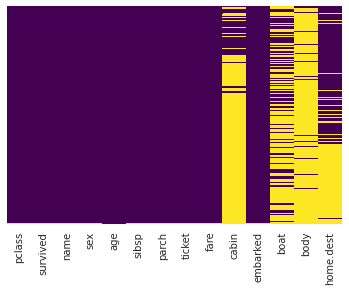

In [58]:
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False,cbar=False)

In [59]:
df.drop(['boat','body','home.dest'],inplace=True,axis=1)

In [60]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

In [61]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S


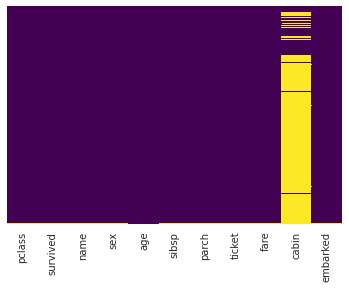

In [62]:
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False,cbar=False)

In [63]:
df.drop('cabin',axis=1,inplace=True)

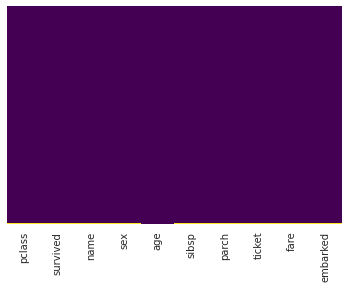

In [64]:
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False,cbar=False)

In [65]:
df.isnull().sum()

pclass      1
survived    1
name        1
sex         1
age         0
sibsp       1
parch       1
ticket      1
fare        2
embarked    3
dtype: int64

In [66]:
df.dropna(inplace=True)

In [67]:
df.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [102]:
pd.get_dummies(df['sex'])

,female,male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
1304,1,0
1305,1,0
1306,0,1
1307,0,1


In [103]:
pd.get_dummies(df['sex'],drop_first=True)

,male
0,0
1,1
2,0
3,1
4,0
...,...
1304,0
1305,0
1306,1
1307,1


In [104]:
sex = pd.get_dummies(df['sex'],drop_first=True)
embark = pd.get_dummies(df['embarked'],drop_first=True)
embark.head() # it will automatically drop one column in this case C

,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [71]:
df['embarked'].value_counts()

S    913
C    270
Q    123
Name: embarked, dtype: int64

In [72]:
df = pd.concat([df,sex,embark],axis=1)

In [73]:
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,male,Q,S
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,0,0,1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,1,0,1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,0,0,1


In [74]:
df.drop(['name'],inplace=True,axis=1)

In [75]:
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,male,Q,S
0,1.0,1.0,female,29.0000,0.0,0.0,24160,211.3375,S,0,0,1
1,1.0,1.0,male,0.9167,1.0,2.0,113781,151.5500,S,1,0,1
2,1.0,0.0,female,2.0000,1.0,2.0,113781,151.5500,S,0,0,1
3,1.0,0.0,male,30.0000,1.0,2.0,113781,151.5500,S,1,0,1
4,1.0,0.0,female,25.0000,1.0,2.0,113781,151.5500,S,0,0,1


In [106]:
df.drop(['sex'],inplace=True,axis=1)

In [115]:
df.drop(['ticket'],inplace=True,axis=1)

In [124]:
df.drop(['embarked'],inplace=True,axis=1)

In [125]:
df.head()

,pclass,age,sibsp,parch,fare,male,Q,S
0,1.0,29.0000,0.0,0.0,211.3375,0,0,1
1,1.0,0.9167,1.0,2.0,151.5500,1,0,1
2,1.0,2.0000,1.0,2.0,151.5500,0,0,1
3,1.0,30.0000,1.0,2.0,151.5500,1,0,1
4,1.0,25.0000,1.0,2.0,151.5500,0,0,1


In [77]:
y=df['survived']
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,male,Q,S
0,1.0,1.0,female,29.0000,0.0,0.0,24160,211.3375,S,0,0,1
1,1.0,1.0,male,0.9167,1.0,2.0,113781,151.5500,S,1,0,1
2,1.0,0.0,female,2.0000,1.0,2.0,113781,151.5500,S,0,0,1
3,1.0,0.0,male,30.0000,1.0,2.0,113781,151.5500,S,1,0,1
4,1.0,0.0,female,25.0000,1.0,2.0,113781,151.5500,S,0,0,1


In [78]:
y

0       1.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
1304    0.0
1305    0.0
1306    0.0
1307    0.0
1308    0.0
Name: survived, Length: 1306, dtype: float64

In [79]:
X = df.drop(['survived'],inplace=True,axis=1)

In [126]:
X = df

In [128]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  1306 non-null   float64
 1   age     1306 non-null   float64
 2   sibsp   1306 non-null   float64
 3   parch   1306 non-null   float64
 4   fare    1306 non-null   float64
 5   male    1306 non-null   uint8  
 6   Q       1306 non-null   uint8  
 7   S       1306 non-null   uint8  
dtypes: float64(5), uint8(3)
memory usage: 65.0 KB


In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=101) # random splits.

In [131]:
from sklearn.linear_model import LogisticRegression

In [132]:
logm = LogisticRegression()

In [133]:
logm.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [134]:
predicted = logm.predict(X_test)

In [135]:
from sklearn.metrics import classification_report

In [136]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

         0.0       0.87      0.82      0.85       169
         1.0       0.71      0.78      0.74        93

    accuracy                           0.81       262
   macro avg       0.79      0.80      0.80       262
weighted avg       0.82      0.81      0.81       262



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


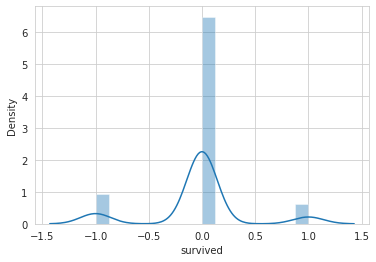

In [137]:
sns.distplot((y_test-predicted))

In [138]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predicted))

[[139  30]
 [ 20  73]]


In [139]:
from google.colab import files
uploaded = files.upload()

Saving advertising.csv to advertising.csv


In [140]:
data = pd.read_csv('advertising.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [142]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


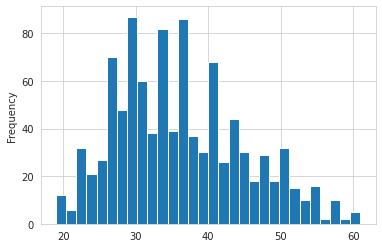

In [144]:
data['Age'].plot.hist(bins=30)

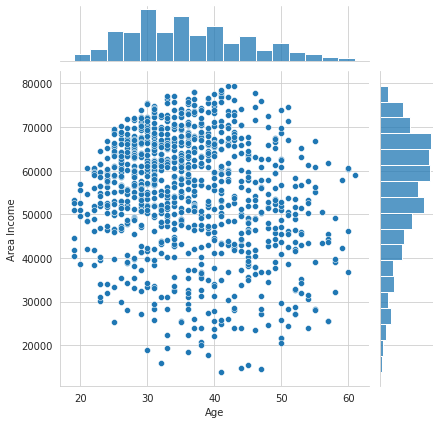

In [145]:
sns.jointplot(data=data, x='Age', y='Area Income')

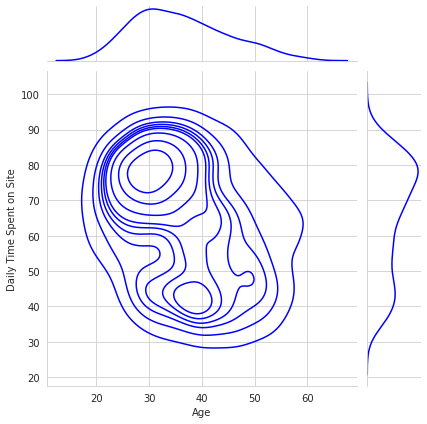

In [149]:
sns.jointplot(data=data, x='Age', y='Daily Time Spent on Site',kind='kde',color='blue')

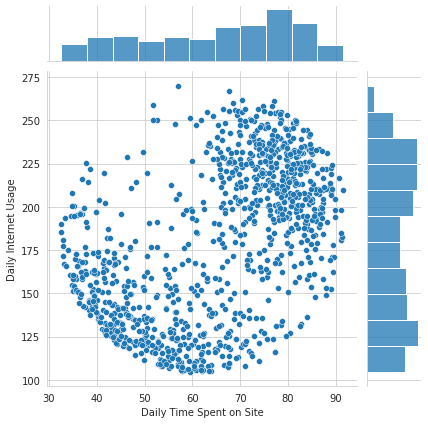

In [150]:
sns.jointplot(data=data, x='Daily Time Spent on Site', y='Daily Internet Usage')

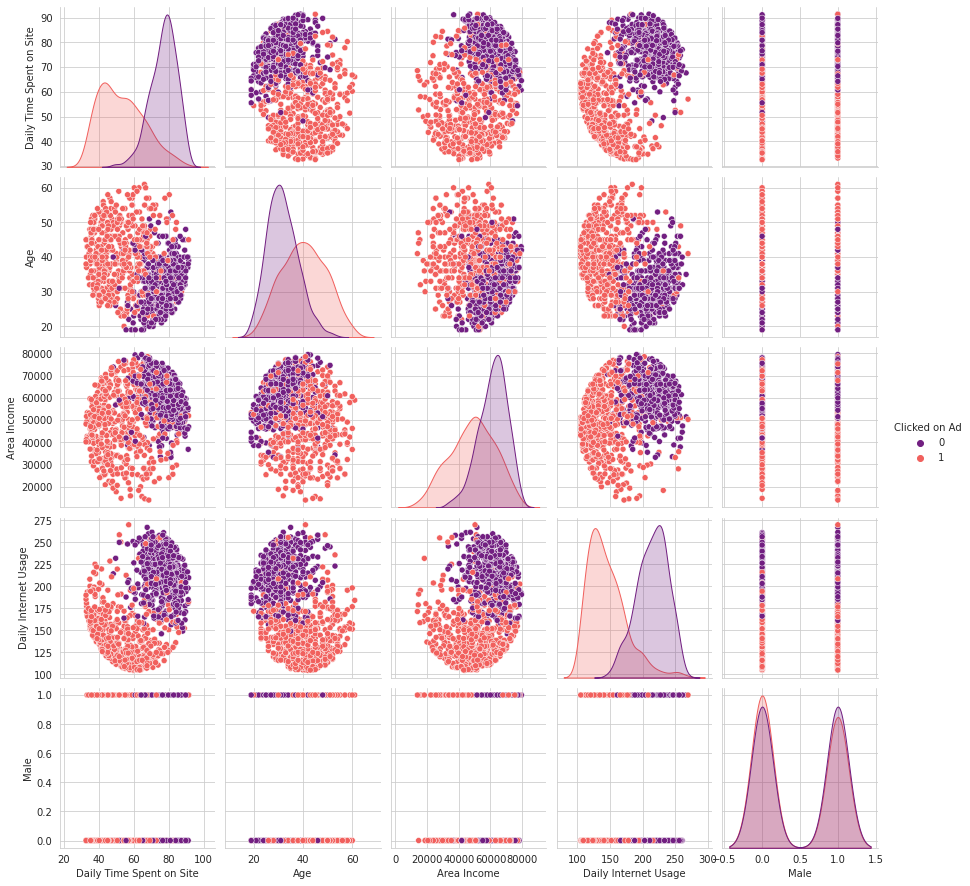

In [152]:
sns.pairplot(data,hue='Clicked on Ad',palette='magma')

In [154]:
data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [156]:
data.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


In [157]:
 from sklearn.model_selection import train_test_split
 X = data[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']]
 y = data['Clicked on Ad']
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=101) # random splits.

In [159]:
from sklearn.linear_model import LogisticRegression
logm = LogisticRegression()

In [160]:
logm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [161]:
predicted = logm.predict(X_test)

In [162]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       105
           1       0.93      0.88      0.91        95

    accuracy                           0.92       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.92      0.91       200

